# <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<div style="text-align: center"> <Strong> <font size = 5> PAP: </font> </Strong> Programa de modelación matemática para el desarrollo de planes y proyectos de negocio.<br><br> </div>

<div style="text-align: center"> <Strong> <font size = 5> CHANGE POINT DETECTION </font> </Strong> <br><br> </div>

<div style="text-align: center"> <Strong> <font size = 3> Integrante 1 </font> </Strong> Carlos Alfonso Barboza Espinoza  </div>

<div style="text-align: center"> <Strong> <font size = 3> Integrante 2 </font> </Strong> Jaime Eduardo Vázquez Guzmán </div>


In [1]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='S7LAJYJXKS29HWS8',output_format='pandas')
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize']= 16,8
plt.style.use('seaborn-darkgrid')
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
import pandas as pd
from urllib.parse import urlencode
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

In [2]:
from datetime import datetime
import ruptures
import changefinder
from statsmodels.tsa.stattools import adfuller

C:\Users\casos\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
quotes, meta_data = ts.get_intraday(symbol='USDMXN',interval='60min', outputsize='full')
del(quotes['5. volume'])
quotes = quotes.rename(columns = {'1. open':'Open', '2. high':'High', '3. low':'Low', '4. close':'Close'})

In [4]:
quotesd, meta_datad = ts.get_daily(symbol='USDMXN', outputsize='full')
del(quotesd['5. volume'])
quotesd = quotesd.rename(columns = {'1. open':'Open', '2. high':'High', '3. low':'Low', '4. close':'Close'})

In [5]:
quotes = quotes[::-1]
quotesd = quotesd[::-1]

<div style="text-align: center"> <Strong> <font size = 6> CONTEXTUALIZACIÓN </font> </Strong> <br><br> </div>

<div style="text-align: center"> <Strong> <font size = 5> ¿Qué es? </font> </Strong> </div>

<div style="text-align: center"> <font size = 4> Es un análisis estadistico, su función  </font> 
<div style="text-align: center"> <font size = 4> es detectar los puntos en donde el proceso </font> 
<div style="text-align: center"> <font size = 4> estocástico o la serie de tiempo cambia. </font> 

<div style="text-align: left"> <font size = 4> Serie de tiempo.  </font> 
<div style="text-align: left"> <font size = 4> Es una secuencia infinita de datos.  </font> 
<div style="text-align: left"> <font size = 4> S = {x1, x2, …, xn}  </font> 
    
<div style="text-align: right"> <font size = 4> Serie de tiempo estacionaria.  </font> 
<div style="text-align: right"> <font size = 4> La media de la serie es lineal durante todo el tiempo.(Constante)  </font> 
<div style="text-align: right"> <font size = 4> μt = E(xt)  </font> 

<div style="text-align: center"> <Strong> <font size = 5> Función de costo </font> </Strong> <br><br> </div>

<div style="text-align: center"> <Strong> <font size = 4> $$C(yI)=|I|log(μI)$$ </font> </Strong> </div>

<div style="text-align: left"> <font size = 3> "C" es la función de costo. </font> <br><br>
<div style="text-align: left"> <font size = 3> "I" es el intérvalo. </font> <br><br>
<div style="text-align: left"> <font size = 3> "y" es la secuencia. </font> <br><br>
<div style="text-align: left"> <font size = 3> "μ" es la media. </font> <br><br>

<div style="text-align: left"> <Strong> <font size = 6> Tipos de change point detection. </font> </Strong> <br><br> </div>

<div style="text-align: left"> <font size = 4> PELT (Pruned Exact Linear Time) . </font> <br><br>
<div style="text-align: left"> <font size = 4> Dynamic programming search method. </font> <br><br>
<div style="text-align: left"> <font size = 4> Binary segmentation search method. </font> <br><br>
<div style="text-align: left"> <font size = 4> Window-based search method. </font> <br><br>

<div style="text-align: center"> <Strong> <font size = 5> Ecuación segmentación binaria. </font> </Strong> <br><br> </div>

<div style="text-align: center"> <Strong> <font size = 4> $$ C(y_{(1:t)})+C(y_{(t+1:n)})+ β < C(y_{(1:n)}) $$ </font> </Strong> </div>

<div style="text-align: left"> <font size = 3> "C" es la función de costo. </font> <br><br>
<div style="text-align: left"> <font size = 3> "B" es la penalización. </font> <br><br>
<div style="text-align: left"> <font size = 3> "y" es la secuencia. </font> <br><br>
    

<div style="text-align: center"> <Strong> <font size = 4> Algoritmo Binary segmentation </font> </Strong> </div>

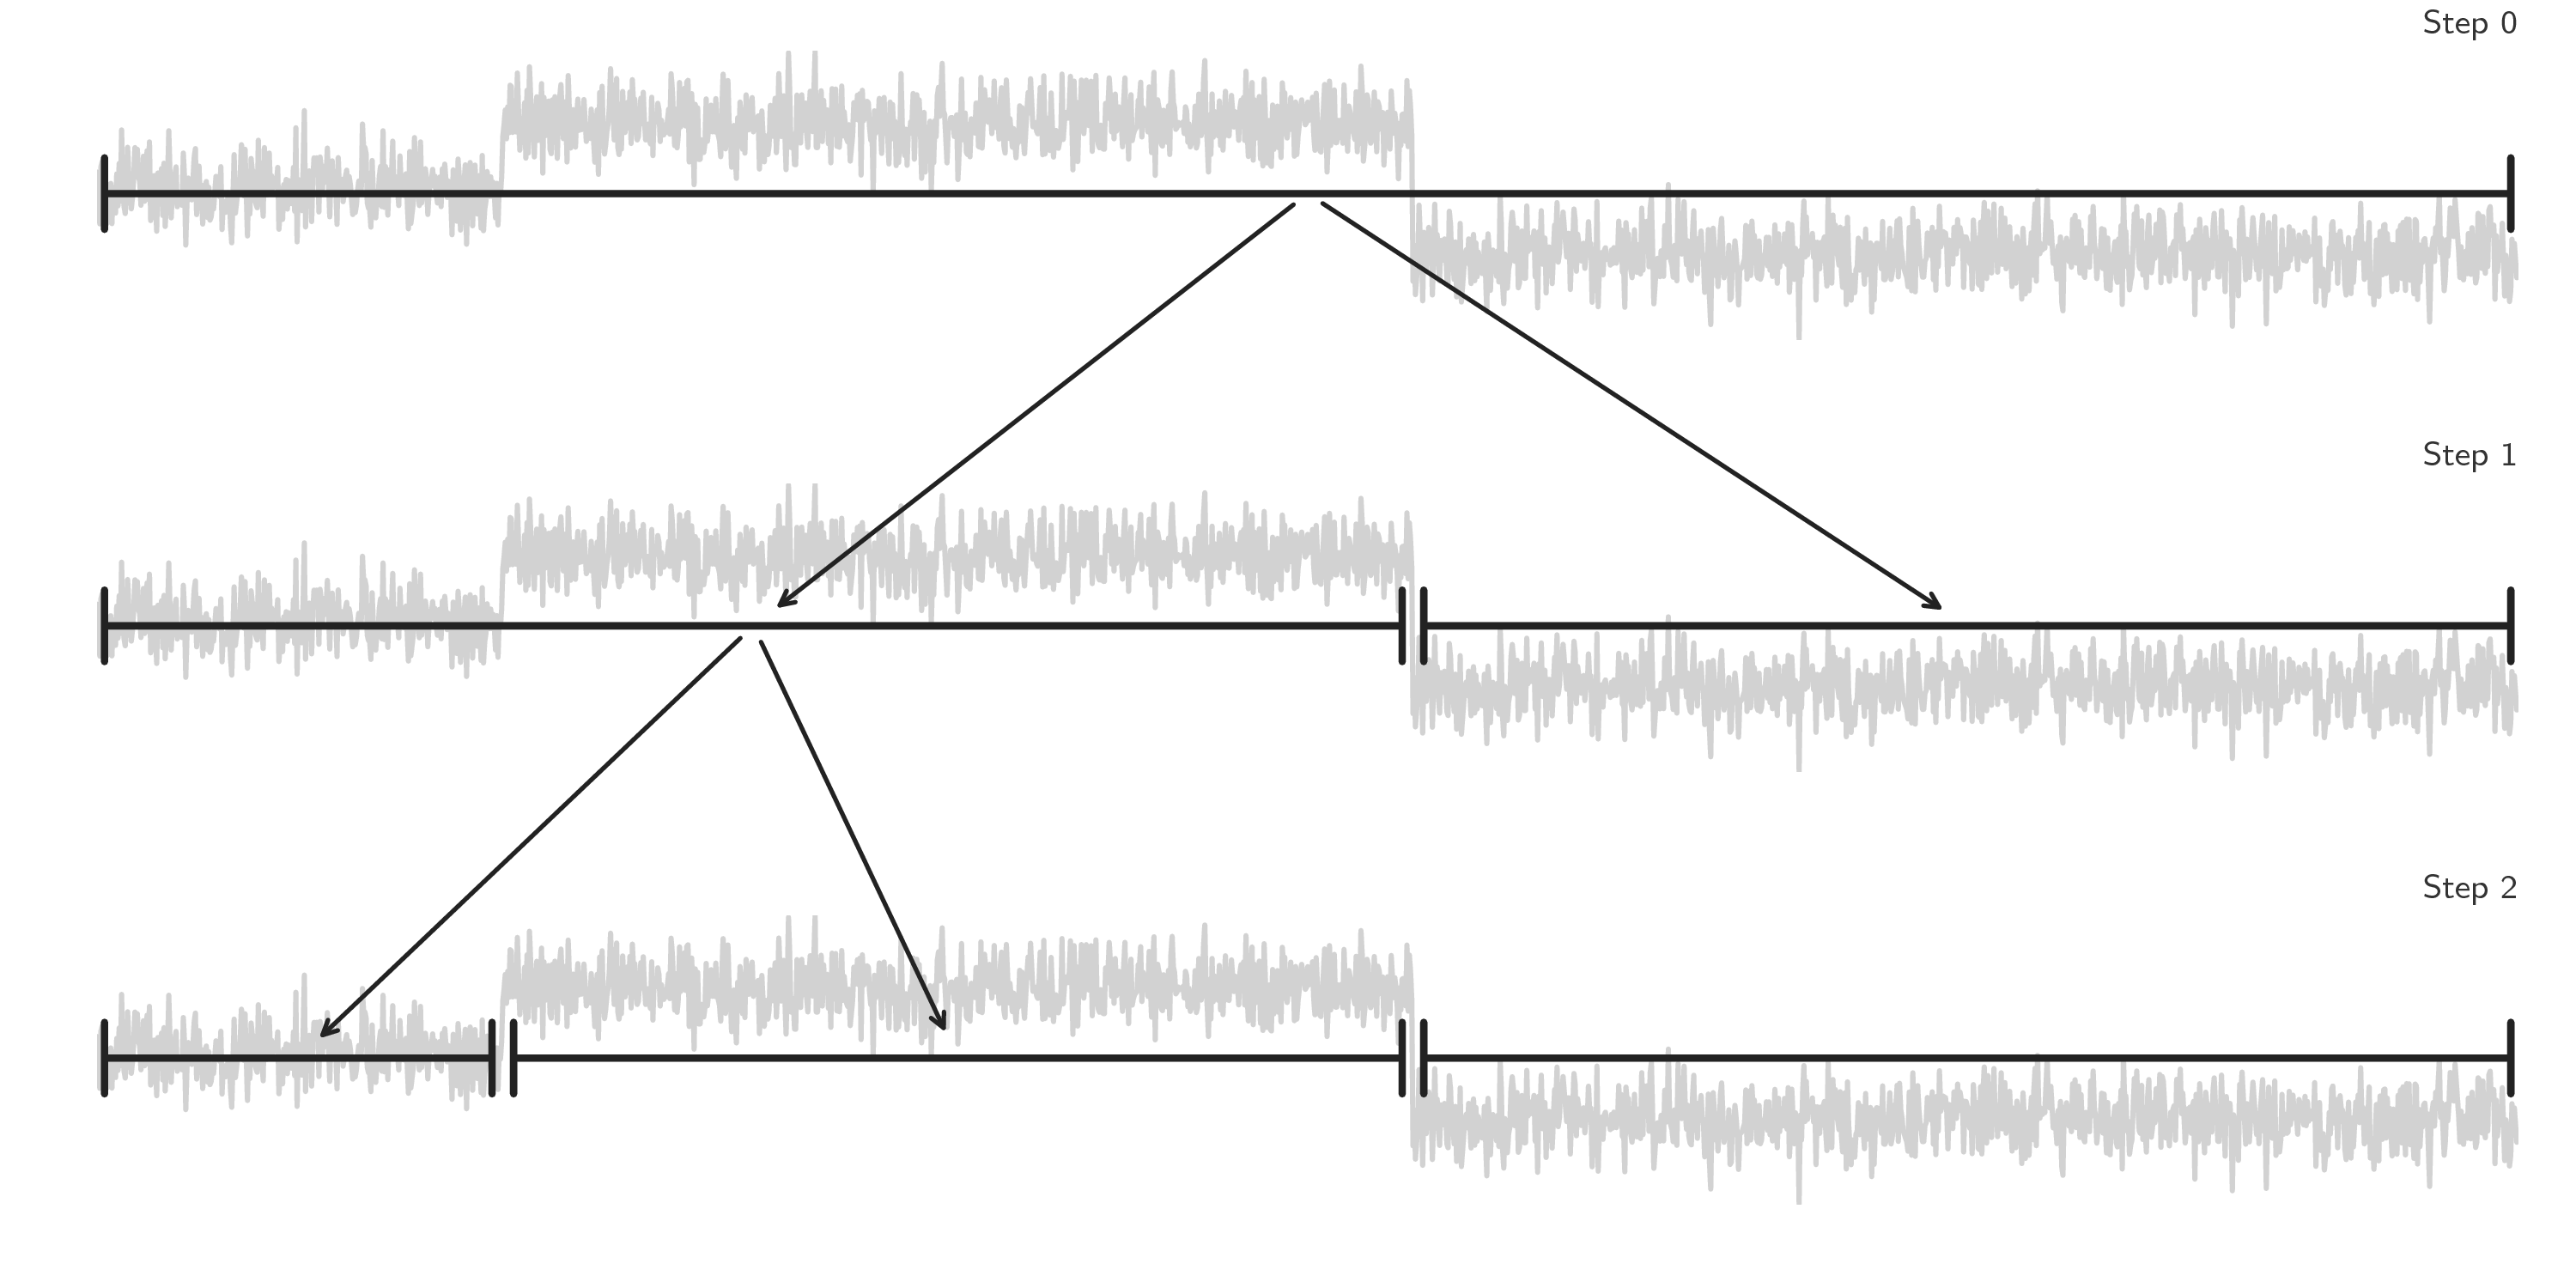


<div style="text-align: center"> <Strong> <font size = 5> Ecuación Window-based. </font> </Strong> <br><br> </div>

<div style="text-align: center"> <Strong> <font size = 4> $$d(y_{u..v},y_{v..w})=C(y_{u..w})−C(y_{u..v})−C(y_{v..w})$$ </font> </Strong> </div>

<div style="text-align: left"> <font size = 3> "C" es la función de costo. </font> <br><br>
<div style="text-align: left"> <font size = 3> "y" es la secuencia de datos. </font> <br><br>
<div style="text-align: left"> <font size = 3> "u,v,w" son los límites de la ventana. </font> <br><br>

<div style="text-align: center"> <Strong> <font size = 4> Algoritmo Window-based </font> </Strong> </div>

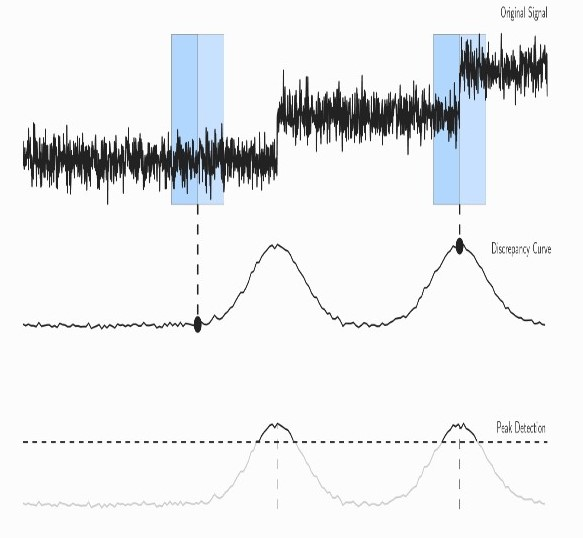

In [46]:
Serie = np.array(quotesd['Close'])
Tiempo = np.array([quotesd.index])

In [79]:
quotesd

Open     High      Low    Close
date                                          
2014-11-24  13.6205  13.6625  13.6002  13.6552
2014-11-25  13.6564  13.6840  13.6150  13.6745
2014-11-26  13.6740  13.7658  13.6390  13.7174
2014-11-27  13.7184  13.7856  13.6915  13.7601
2014-11-28  13.7609  13.9583  13.7505  13.9200
...             ...      ...      ...      ...
2020-09-29  22.4165  22.5386  22.1670  22.4120
2020-09-30  22.4134  22.5450  22.0197  22.0792
2020-10-01  22.0538  22.1086  21.7770  21.8077
2020-10-02  21.8098  22.0633  21.5510  21.6097
2020-10-04  21.6012  21.6462  21.5799  21.6280

[1531 rows x 4 columns]

In [80]:
quotes

Open     High      Low    Close
date                                                   
2020-08-10 05:00:00  22.4269  22.4625  22.4050  22.4602
2020-08-10 06:00:00  22.4595  22.4869  22.4220  22.4711
2020-08-10 07:00:00  22.4714  22.4880  22.4060  22.4251
2020-08-10 08:00:00  22.4280  22.4333  22.3492  22.3692
2020-08-10 09:00:00  22.3681  22.4214  22.3468  22.4098
...                      ...      ...      ...      ...
2020-10-02 14:00:00  21.6110  21.7095  21.5610  21.6910
2020-10-02 15:00:00  21.6910  21.6924  21.6190  21.6596
2020-10-02 16:00:00  21.6549  21.7263  21.6180  21.6560
2020-10-02 17:00:00  21.6600  21.6661  21.5900  21.6084
2020-10-04 19:00:00  21.6012  21.6462  21.5799  21.6351

[943 rows x 4 columns]

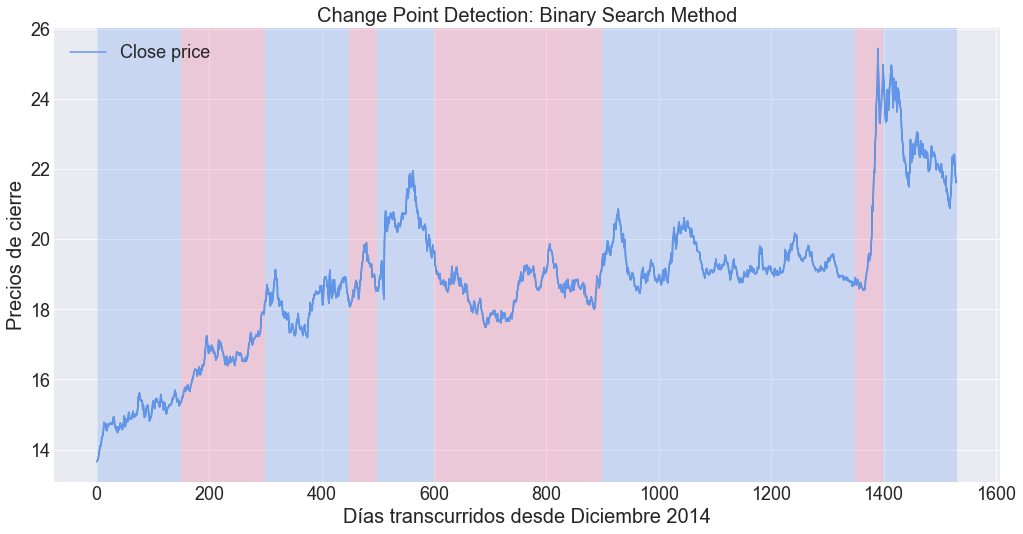

In [48]:
model = "l2"
modelo = ruptures.Binseg(model=model, min_size=10, jump= 50).fit(Serie)
result = modelo.predict(n_bkps=8, pen=10.5)
ruptures.display(Serie, result, figsize=(14, 7))
plt.plot(Serie, label='Close price', color='cornflowerblue')
plt.title('Change Point Detection: Binary Search Method', size=20)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
plt.xlabel('Días transcurridos desde Diciembre 2014',size=20)
plt.ylabel('Precios de cierre',size=20)
plt.legend(loc='upper left', fontsize=(18))
plt.show()  

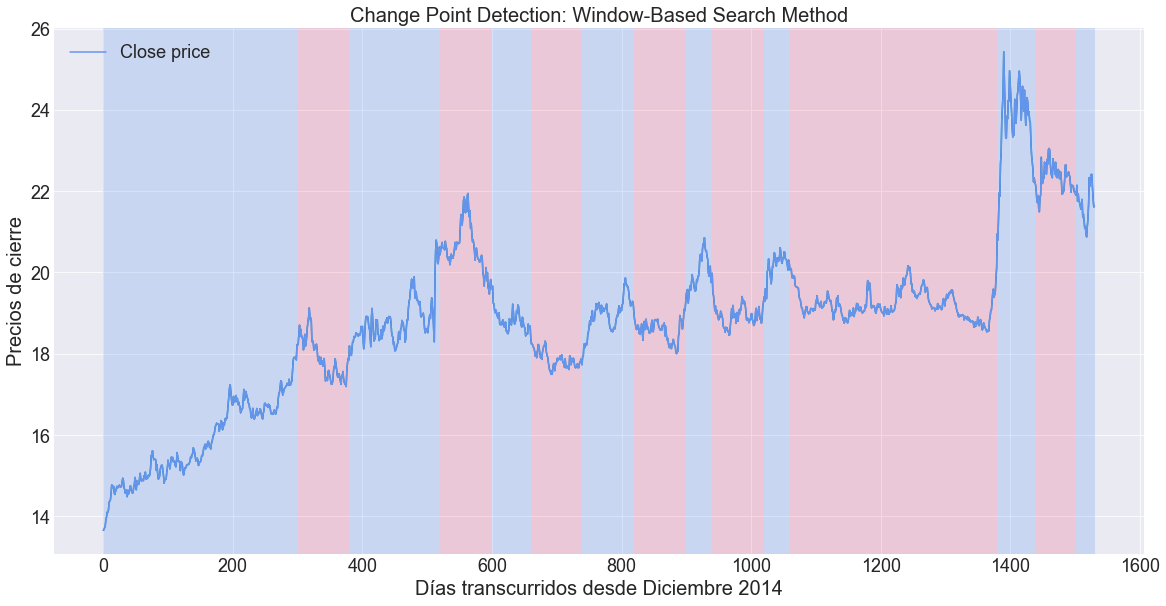

In [77]:
model = "l2"  
modelo3 = ruptures.Window(width=30, model=model, min_size=10, jump=20).fit(Serie)
my_bkps = modelo3.predict(n_bkps=14, pen= 10)
ruptures.show.display(Serie, my_bkps, figsize=(16, 8))
plt.title('Change Point Detection: Window-Based Search Method', size=20)
plt.plot(Serie, label='Close price', color='cornflowerblue')
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
plt.xlabel('Días transcurridos desde Diciembre 2014',size=20)
plt.ylabel('Precios de cierre',size=20)
plt.legend(loc='upper left', fontsize=(18))
plt.show()  

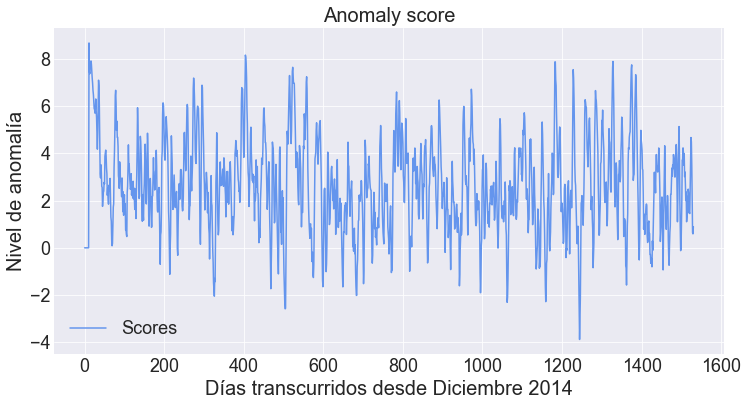

In [81]:
plt.figure(figsize=(12, 6))
plt.title('Anomaly score', size=20)
plt.plot(scores, label='Scores', color='cornflowerblue')
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
plt.xlabel('Días transcurridos desde Diciembre 2014',size=20)
plt.ylabel('Nivel de anomalía',size=20)
plt.legend(loc='lower left', fontsize=(18))

plt.show()  

<div style="text-align: center"> <Strong> <font size = 5> Conclusiones. </font> </Strong> <br><br> </div>

* Se puede utilizar en series diarias, por hora e incluso por minuto. 
* Con un buen modelo se garantiza el cambio de precio en su estructura. 
* Mientras más datos se tengan más preciso es al momento de identificar el cambio. 
* La falta de uso que se tiene de este método en temas financieros. 
* Con el término de penalización en el código puedes evitar el overfitting.

<div style="text-align: center"> <Strong> <font size = 5> Bibliografía. </font> </Strong> <br><br> </div>

* Truong, Charles & Oudre, Laurent & Vayatis, Nicolas (2018), A review of change point detection methods. 
* Christian Rohrbeck (2017), Detection of changes in variance using binary segmentation and optimal partitioning.
* https://www.researchgate.net/publication/322221081_A_review_of_change_point_detection_methods
* https://www.lancaster.ac.uk/pg/rohrbeck/ResearchTopicI.pdf
* https://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/detection/binseg.html
* https://www.alphavantage.co/documentation/
* https://www.researchgate.net/publication/322221081_A_review_of_change_point_detection_methods 
* https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/ 
* https://github.com/deepcharles/ruptures